# Import necessary library

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact,widgets
from IPython.display import display
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
path = r'/home/nguyen/PycharmProjects/pythonopencv/assignment1.png'

# 1. Read & write and image

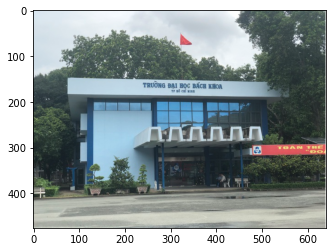

True

In [3]:
#read image and show
image = mpimg.imread(path)
plt.imshow(image)
plt.show()

#write_image
read_image = cv2.imread(path)
cv2.imwrite('save_image.png',read_image)


# 2. Convert image to gray scale

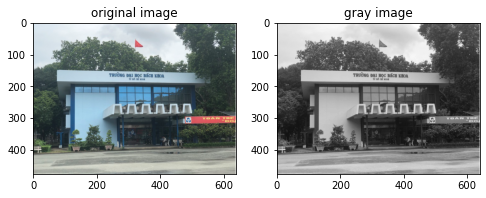

In [4]:
R, G, B = image[:,:,0], image[:,:,1], image[:,:,2]
gray_image = 0.2989 * R + 0.5870 * G + 0.1140 * B

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
plt.title('original image')
fig.add_subplot(1, 2, 2)
plt.imshow(gray_image,cmap=plt.get_cmap('gray'))
plt.title('gray image')

plt.show()

# 3. Plot histogram of original & gray scale image

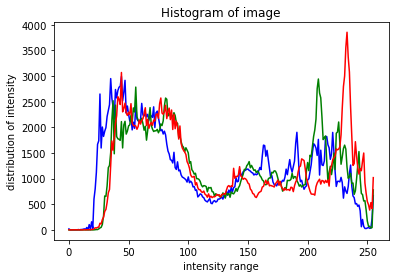

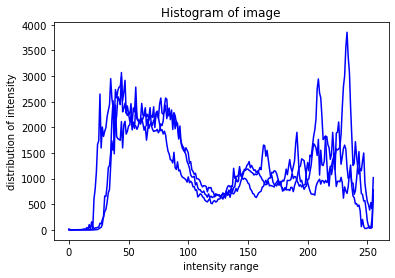

In [6]:
def RGB_hist(image):
    hist_range = np.zeros((256,3))
    image = np.round(image*255).astype(np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(3):
                hist_range[image[i,j,k],k] +=1
        
    return hist_range

def gray_hist(image):
    hist_range = np.zeros(256)
    image = np.round(image*255).astype(np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist_range[image[i,j]] +=1
                    
    return hist_range

image_hist = RGB_hist(image)
plt.plot(range(256),image_hist[:,0],color = 'blue')
plt.plot(range(256),image_hist[:,1],color = 'green')
plt.plot(range(256),image_hist[:,2],color = 'red')
plt.xlabel('intensity range')
plt.ylabel('distribution of intensity')
plt.title('Histogram of image')
plt.show()

hst = gray_hist(gray_image)
plt.plot(range(256),image_hist,color = 'blue')
plt.xlabel('intensity range')
plt.ylabel('distribution of intensity')
plt.title('Histogram of image')
plt.show()



    

 Compare hist function with cv.calcHist() function

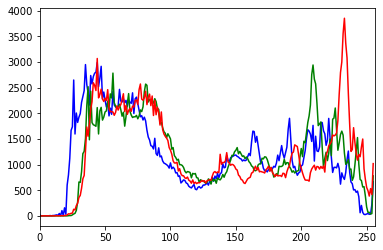

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image*255],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

#.ravel() : squeeze to 1 dimension

# 4. Image Transformation: image negative, increase/decrease brightness of an image

Image negative

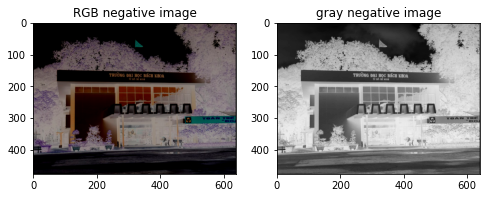

In [13]:
B_negative_image = (1-image[:,:,0])
G_negative_image = (1-image[:,:,1])
R_negative_image = (1-image[:,:,2])
gray_negative_image = (1-gray_image)
negative_image = np.stack((B_negative_image,G_negative_image,R_negative_image),axis=2)

fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(negative_image)
plt.title('RGB negative image')
fig.add_subplot(1, 2, 2)
plt.imshow(gray_negative_image,cmap='gray')
plt.title('gray negative image')

plt.show()

Increase/decrease brightness of an image

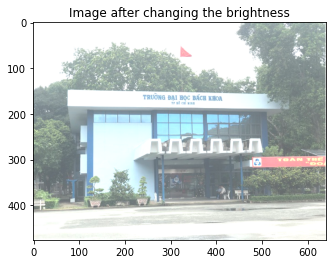

In [8]:
alpha = 1 # control contrast 
beta = 80/255 #control brightness
# adjust image according to equation g(x)=αf(x)+β

adjust_image = image


for i in range(adjust_image.shape[0]):
    for j in range(adjust_image.shape[1]):
        for k in range(adjust_image.shape[2]):
            adjust_image[i,j,k] = image[i,j,k] + beta
            if adjust_image[i,j,k] > 1:
                adjust_image[i,j,k] = 1
            elif adjust_image[i,j,k] < 0:
                adjust_image[i,j,k] = 0

plt.imshow(adjust_image)
plt.title('Image after changing the brightness')
plt.show()

    
    

# Algorithm for histogram Equalization: compare with  cv2.equalizeHist

Histogram equalization

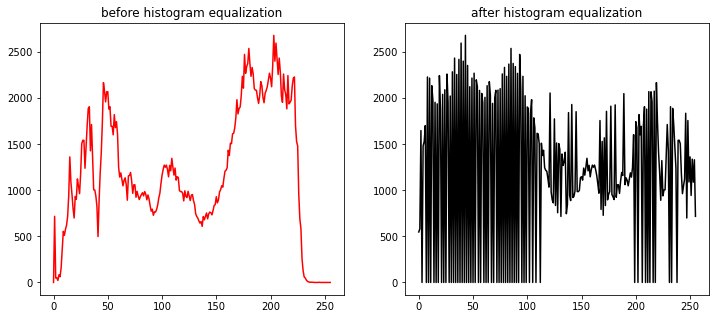

In [9]:
gray_image_hist= gray_hist(gray_image)
normailized_hist = gray_image_hist / (gray_image.shape[0]*gray_image.shape[1])
cdf = np.cumsum(normailized_hist) # calculate cdf
s_r = np.round(cdf*255).astype(np.uint8) # calculate s_r
# mapping s_r with p_r
gray_image = np.round(gray_image*255).astype(np.uint8)
equalize_image = np.zeros(gray_image.shape)
for i in range(equalize_image.shape[0]):
    for j in range(equalize_image.shape[1]):
        equalize_image[i,j] = s_r[gray_image[i,j]]
#show the histogram of image after histogram Equalization

gray_h = gray_hist(gray_image) # histogram of original gray image

equalize_image /= 255
equa_hist = gray_hist(equalize_image) #histogram of histogram equalization image

fig = plt.figure(figsize=(12, 5))
fig.add_subplot(1, 2, 1)
plt.plot(range(256),gray_h,color = 'red')
plt.title("before histogram equalization")
fig.add_subplot(1, 2, 2)
plt.plot(range(256),equa_hist,color='black')
plt.title('after histogram equalization')
plt.show()


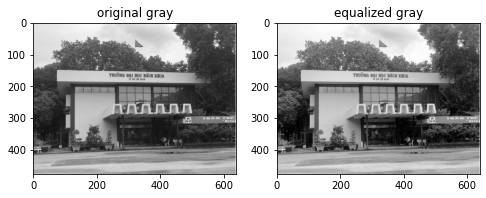

In [10]:
# show the image after histogram Equalization
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(gray_image,cmap='gray')
plt.title('original gray')
fig.add_subplot(1, 2, 2)
plt.imshow(equalize_image,cmap='gray')
plt.title('equalized gray')
plt.show()

Comparing with histogram equalization by cv2.equalizeHist func

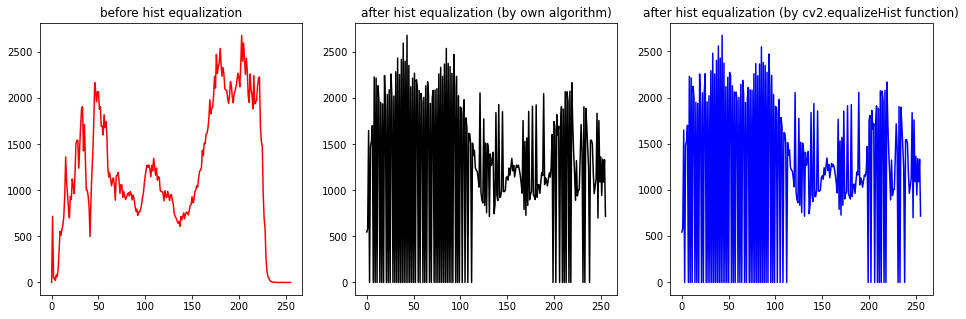

In [11]:
# gray_normalized = np.round(gray_image*255)
# equa = cv2.equalizeHist(gray_normalized)
# equa = equa / 255
# func_hist = gray_hist(equa)

gray_normalized = cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2GRAY)
equa = cv2.equalizeHist(gray_normalized)
equa = equa / 255
func_hist = gray_hist(equa)

#show the histogram of image after histogram Equalization
fig = plt.figure(figsize=(16, 5))
fig.add_subplot(1, 3, 1)
plt.plot(range(256),gray_h,color = 'red')
plt.title("before hist equalization")
fig.add_subplot(1, 3, 2)
plt.plot(range(256),equa_hist,color='black')
plt.title('after hist equalization (by own algorithm)')
fig.add_subplot(1, 3, 3)
plt.plot(range(256),func_hist,color = 'blue')
plt.title('after hist equalization (by cv2.equalizeHist function)')
plt.show()

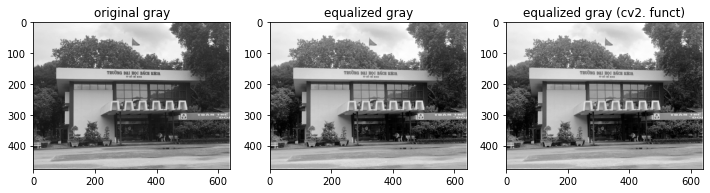

In [12]:
# show the image after histogram Equalization
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(1, 3, 1)
plt.imshow(gray_image,cmap='gray')
plt.title('original gray')
fig.add_subplot(1, 3, 2)
plt.imshow(equalize_image,cmap='gray')
plt.title('equalized gray')
fig.add_subplot(1, 3, 3)
plt.imshow(equa,cmap = 'gray')
plt.title('equalized gray (cv2. funct)')
plt.show()